TODO

- **CODE**: Add to AWS
- **Code**: Combine with Workout Analysis
- **Code** Theorise and create infrastructure for work days. Work binary? And then multiply by 6hrs or so which is an estimate of academic productivity during that. Or 6hrs acad 3hrs TODO.
- **Visualisations**: Monthly Preprocessing: Extract last n months to visualise (define parameter)
- **Visualisations**: Y: Total Productivity, Y: Academic vs Other, Y: Project Breakdown etc.
- **Visualisations**: Consider doing all visualisations on PowerBI and upload images here. 
- **Visualisations**: Add lineplots in addition to barplots.
- **Visualisations**: Add axhline to monthly plots with the average of each year
- **Visualisations**: Make sure (especially in workouts monthly plot) that if a month from new data has 0 workouts that it still shows that month in the vis and doesnt skip it


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import datetime

In [2]:
df = pd.read_csv('toggl.csv')

### 🔵 Preprocessing

In [3]:
# Drop redundant fields
df = df.drop(['User', 'Email', 'Client', 'Billable', 'Amount ()'], axis=1)

# Convert duration string to hours (float)
df['Duration']=pd.to_timedelta(df['Duration']).astype('timedelta64[s]').astype(int) / 3600
df = df.rename(columns={'Duration': 'Duration (hrs)'})

# Combine date
df['Start'] = pd.to_datetime(df['Start date'] + ' ' + df['Start time'], yearfirst=True)
df['End'] = pd.to_datetime(df['End date'] + ' ' + df['End time'], yearfirst=True)

# Drop nans in project. Uncomment these lines to explore nans
# print('NANs in PROJECT: ')
# display(df[df.Project.isna()])
df = df[df.Project.notna()]

# TODO: Remove this after testing and when you have more data. Removes out old projects
#df = df[(df.Project != 'Applied Data Science') & (df.Project != 'Statistics for Data Science') & (df.Project != 'Machine Learning 1') & (df.Project != 'MSc Project') & (df.Project != 'ML2') & (df.Project != 'BML') & (df.Project != 'Reinforcement Learning')]
df['Project'].replace('Applied Data Science', 'Data Science', inplace=True)
df['Project'].replace('Statistics for Data Science', 'Data Science', inplace=True)
df['Project'].replace('Machine Learning 1', 'Data Science', inplace=True)
df['Project'].replace('MSc Project', 'Data Science', inplace=True)
df['Project'].replace('ML2', 'Data Science', inplace=True)
df['Project'].replace('BML', 'Data Science', inplace=True)
df['Project'].replace('Reinforcement Learning', 'Data Science', inplace=True)


df

,Project,Task,Description,Start date,Start time,End date,End time,Duration (hrs),Tags,Start,End
0,To-Do,NaN,GENERAL,2022-10-01,09:21:41,2022-10-01,09:22:24,0.011944,NaN,2022-10-01 09:21:41,2022-10-01 09:22:24
1,Weight,NaN,70.3,2022-10-01,09:22:27,2022-10-01,09:22:44,0.004722,NaN,2022-10-01 09:22:27,2022-10-01 09:22:44
2,To-Do,NaN,GENERAL,2022-10-01,09:29:49,2022-10-01,09:40:39,0.180556,NaN,2022-10-01 09:29:49,2022-10-01 09:40:39
3,To-Do,NaN,JOBS,2022-10-01,09:36:47,2022-10-01,09:49:09,0.206111,NaN,2022-10-01 09:36:47,2022-10-01 09:49:09
4,To-Do,NaN,JOBS,2022-10-01,10:38:51,2022-10-01,11:21:53,0.717222,NaN,2022-10-01 10:38:51,2022-10-01 11:21:53
...,...,...,...,...,...,...,...,...,...,...,...
304,Data Science,NaN,POWERBI-Track,2022-10-12,20:37:59,2022-10-12,20:51:33,0.226111,NaN,2022-10-12 20:37:59,2022-10-12 20:51:33
305,Data Science,NaN,POWERBI-Track,2022-10-12,20:57:21,2022-10-12,21:06:41,0.155556,NaN,2022-10-12 20:57:21,2022-10-12 21:06:41
306,Data Science,NaN,POWERBI-Track,2022-10-12,21:06:42,2022-10-12,21:07:23,0.011389,NaN,2022-10-12 21:06:42,2022-10-12 21:07:23
307,Data Science,NaN,POWERBI-Track,2022-10-12,21:10:32,2022-10-12,21:16:17,0.095833,NaN,2022-10-12 21:10:32,2022-10-12 21:16:17


In [4]:
print('Unique Projects: ')
for i in range(df.Project.unique().shape[0]):
    print('-', df.Project.unique()[i])

Unique Projects: 
- To-Do
- Weight
- Data Science
- Social
- Notes
- Workout


### 🔵 M: Project Breakdown
My PowerBI Report: 

![alt text](powerbi_month_report.png)

In [5]:
def project_preprocess(df):
    
    df = df[['Project', 'Description', 'Duration (hrs)', 'Start']]
    df = df.rename({'Start': 'Date'})
    df = df.join(df.Description.str.split('-', expand=True).rename(columns={0:'Specific1', 1:'Specific2', 2:'Specific3'}))
    df = df.drop(['Description'], axis=1)
    
    return df
    
df_projects = df.copy()
df_projects = project_preprocess(df_projects)
df_projects.to_csv('new_data.csv')
df_projects

,Project,Duration (hrs),Start,Specific1,Specific2,Specific3
0,To-Do,0.011944,2022-10-01 09:21:41,GENERAL,None,None
1,Weight,0.004722,2022-10-01 09:22:27,70.3,None,None
2,To-Do,0.180556,2022-10-01 09:29:49,GENERAL,None,None
3,To-Do,0.206111,2022-10-01 09:36:47,JOBS,None,None
4,To-Do,0.717222,2022-10-01 10:38:51,JOBS,None,None
...,...,...,...,...,...,...
304,Data Science,0.226111,2022-10-12 20:37:59,POWERBI,Track,None
305,Data Science,0.155556,2022-10-12 20:57:21,POWERBI,Track,None
306,Data Science,0.011389,2022-10-12 21:06:42,POWERBI,Track,None
307,Data Science,0.095833,2022-10-12 21:10:32,POWERBI,Track,None


In [6]:
print('Unique Projects: ')
for proj in df_projects.Project.unique():
    print('   -', proj)

Unique Projects: 
   - To-Do
   - Weight
   - Data Science
   - Social
   - Notes
   - Workout


### 🔵 Y: Preprocessing
1. Preprocess all current data for monthly visualisation

2. Preprocess all old data 

3. Concatenate old and new

In [7]:
# drop projects with 0 duration (where no work was done on that month. automatically defaults to 0 in visualisation)
#df_productive.drop(df_productive[df_productive['Duration (hrs)'] == 0.].index)

def monthly_preprocess(df):
    '''NEW DATA: Oct 2022 - Present'''
    
    # General
    data = df.copy()
    data = data.rename(columns={'Start': 'Date'})
    data['Date'] = data['Date'].dt.strftime('%b %y')
    
    # Productivity df
    df_productive = data.groupby([data['Date'], 'Project'], sort=False, as_index=False).sum()
    df_productive = df_productive.drop(['Task', 'Tags'], axis=1)
    df_productive = df_productive[data.Project != 'Weight']
    
    # Weight df
    df_weight = data[data.Project == 'Weight']
    df_weight = df_weight.drop(['Project', 'Task', 'Start date', 'Start time', 'End date', 'End time', 'Tags', 'End', 'Duration (hrs)'], axis=1)
    df_weight = df_weight.rename({'Description': 'Weight (kg)'}, axis=1)
    
    # Social df
    df_social = data[data.Project == 'Social']
    df_social = df_social.drop(['Task', 'Start date', 'End date', 'End', 'Duration (hrs)'], axis=1)
    
    
    return df_productive, df_weight, df_social

def monthly_preprocess_old():
    
    '''OLD DATA: January 2019 - Sept 2022'''
    
    try:
        old_data=pd.read_csv('old_data_pre.csv')
    except:
        print('old_data.csv not found.')
        
    old_data['Date'] = pd.to_datetime(old_data['Date'], dayfirst=True)
    old_data['Date'] = old_data['Date'].dt.strftime('%b %y')
    old_data = old_data.rename(columns={'Duration': 'Duration (hrs)'})
    old_weight = old_data[old_data.Project == 'Weight']    # extract weight
    old_weight = old_weight.drop('Project', axis=1)
    old_weight = old_weight.rename(columns={'Duration (hrs)': 'Weight (kg)'})
    old_data = old_data[old_data.Project != 'Weight']
    old_data['Duration (hrs)'] = old_data['Duration (hrs)'] / 2    # CGP to hrs
    
    return old_data, old_weight

def monthly_concat(df_productive, df_old, df_weight, df_weight_old):

    df_productive = pd.concat([df_old, df_productive])
    df_productive.reset_index(inplace=True)
    df_productive = df_productive.drop('index', axis=1)

    df_weight = pd.concat([df_weight_old, df_weight])
    df_weight.reset_index(inplace=True)
    df_weight.drop('index', axis=1, inplace=True)
    df_weight['Weight (kg)'] = df_weight['Weight (kg)'].astype(float)
    
    return df_productive, df_weight

In [8]:
# NEW DATA: Oct 2022 - Present
df_productive, df_weight, df_social = monthly_preprocess(df)

# OLD DATA: January 2019 - Sept 2022
df_old, df_weight_old = monthly_preprocess_old()

# COMBINE
df_productive, df_weight = monthly_concat(df_productive, df_old, df_weight, df_weight_old)

# EXPORT
df_productive.to_csv(f'old_data.csv', index=False)       # Total data
df_weight.to_csv(f'weight.csv', index=False)    # Total weight data

# Export Workout data
df_workout = df_productive[df_productive.Project=='Workout']
df_workout.to_csv(f'workout.csv', index=False)  # Total workout data



C:\Users\johng\AppData\Local\Temp\ipykernel_28076\4184726194.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_productive = df_productive[data.Project != 'Weight']


### 🔵 Y: Function: Single Barchart

In [9]:
def plot_monthly_single_barchart(df, title='', color='#A418FF', y_axis= 'Duration (hrs)', y_min=0, figsize=(20,6), legendsize=10, title_size=20, title_pad = 15, bar_label_size=17, x_tick_size = 14, y_tick_size = 13, y_label_size=15, x_tick_rotation = 60): 
    '''
    df: (pandas DF) dataframe with col 1: Date, col 2: Project, col 3: Duration (hrs)
    title: (String) title of the plot
    color: (String) choose from https://htmlcolorcodes.com/, add a hashtag before the code
    
    '''


    plt.style.use('fivethirtyeight') 
    plt.figure(figsize=figsize)
    y_lim = df[y_axis].max() + df[y_axis].max() * 0.20


    ax = sns.barplot(x='Date', y=y_axis, data=df, color=color, ci=None, linewidth=1, edgecolor="k")
    plt.xlabel('')
    plt.ylabel(y_axis, fontsize=y_label_size)
    plt.title(title, fontsize=title_size, fontweight='bold', pad=title_pad)
    plt.ylim([y_min, y_lim])                                                    # Expand y axis range for visibility
    ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
    ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
    #ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_tick_rotation)


    line_locs = []
    line_year = []
    for count, value in enumerate(df.Date):
        if value.startswith('Jan'):
            line_locs.append(count)
            line_year.append('20'+value[-2:])
    for loc, year in zip(line_locs, line_year):
        plt.axvline(x = loc-0.5, color = 'lightblue', label = 'Year', linewidth=4)
        ax.text(loc-0.5 + 5, y_lim - 0.07*y_lim, year, fontsize = 20, 
             bbox = dict(facecolor = 'lightblue', alpha = 0.5))


    plt.show()

### 🔵 Y: Function: Generalise Barchart

In [10]:

# colors = {'Other': "#FFBC18", 
#           'Academic': "#33B2FF"}
# hue_order = ['Academic', 'Other']


# ax = sns.lineplot(x='Date', y='Duration (hrs)', data=df_acad_other, hue='Project', ci=None, palette=colors, hue_order=hue_order)

# plt.legend(title = 'Project Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)






# plt.show()

In [11]:
def plot_monthly_barchart(df, multi_bar=False, title='', color='#A418FF', y_axis= 'Duration (hrs)', y_min=0, figsize=(20,6), legendsize=10, title_size=20, title_pad = 15, bar_label_size=17, x_tick_size = 14, y_tick_size = 13, y_label_size=15, x_tick_rotation = 60, palette='rocket_r', hue_order=['']): 
    '''
    df: (pandas DF) dataframe with col 1: Date, col 2: Project, col 3: Duration (hrs)
    double: (boolean) whether a single or a double (or multiple) barchart should be built. I.e. more than one column per date
    title: (String) title of the plot
    color: (String) choose from https://htmlcolorcodes.com/, add a hashtag before the code
    
    '''


    plt.style.use('fivethirtyeight') 
    plt.figure(figsize=figsize)
    y_lim = df[y_axis].max() + df[y_axis].max() * 0.20

    if multi_bar:
        ax = sns.barplot(x='Date', y=y_axis, data=df, color=color, hue='Project', ci=None, linewidth=1, edgecolor="k", palette=palette, hue_order=hue_order)
        plt.legend(title = 'Project Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        
        line_locs = []
        line_year = []
        for count, value in enumerate(df.Date):
            if value.startswith('Jan'):
                line_locs.append(count)
                line_year.append('20'+value[-2:])
        for loc, year in zip(line_locs, line_year):
            plt.axvline(x = loc-0.5, color = 'lightblue', label = 'Year', linewidth=4)
            ax.text(loc-0.5 + 5, y_lim - 0.07*y_lim, year, fontsize = 20, 
                 bbox = dict(facecolor = 'lightblue', alpha = 0.5))
        
    else:
        ax = sns.barplot(x='Date', y=y_axis, data=df, color=color, ci=None, linewidth=1, edgecolor="k")
        
        line_locs = []
        line_year = []
        for count, value in enumerate(df.Date):
            if value.startswith('Jan'):
                line_locs.append(count)
                line_year.append('20'+value[-2:])
        for loc, year in zip(line_locs, line_year):
            plt.axvline(x = loc-0.5, color = 'lightblue', label = 'Year', linewidth=4)
            ax.text(loc-0.5 + 5, y_lim - 0.07*y_lim, year, fontsize = 20, 
                 bbox = dict(facecolor = 'lightblue', alpha = 0.5))
    
    plt.xlabel('')
    plt.ylabel(y_axis, fontsize=y_label_size)
    plt.title(title, fontsize=title_size, fontweight='bold', pad=title_pad)
    plt.ylim([y_min, y_lim])                                                    # Expand y axis range for visibility
    ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
    ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
    #ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_tick_rotation)


    


    plt.show()

In [12]:
#plot_monthly_barchart(df_acad_other, multi_bar=True)

### 🔵 Y: Weight & Workout

#### 🔴Weight

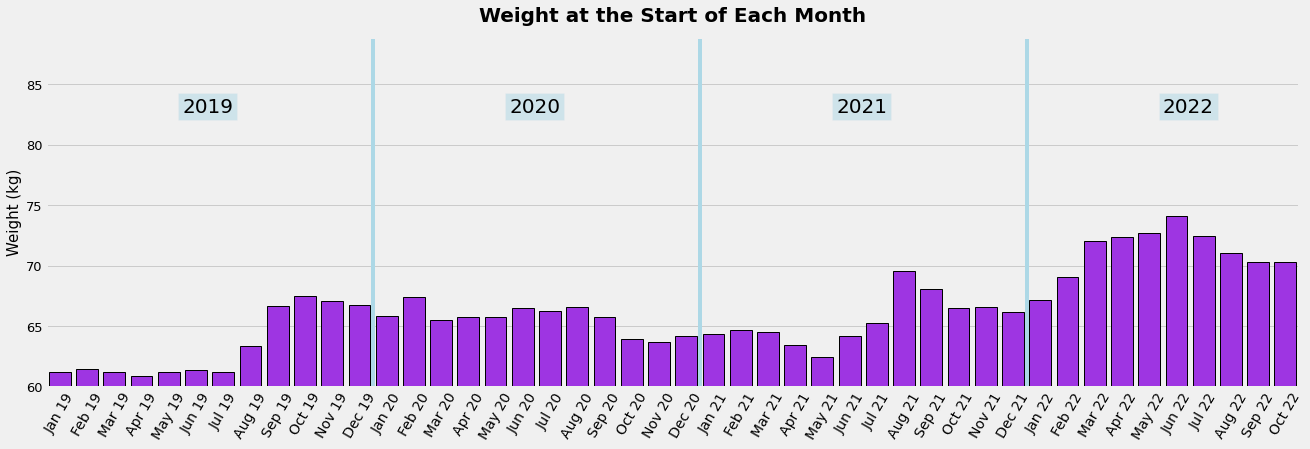

In [13]:
plot_monthly_single_barchart(df_weight, y_axis='Weight (kg)', title='Weight at the Start of Each Month', y_min=60)


# ax=sns.lineplot(x='Date', y='Weight (kg)', data=df_weight)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.show()

#### 🔴 Workout

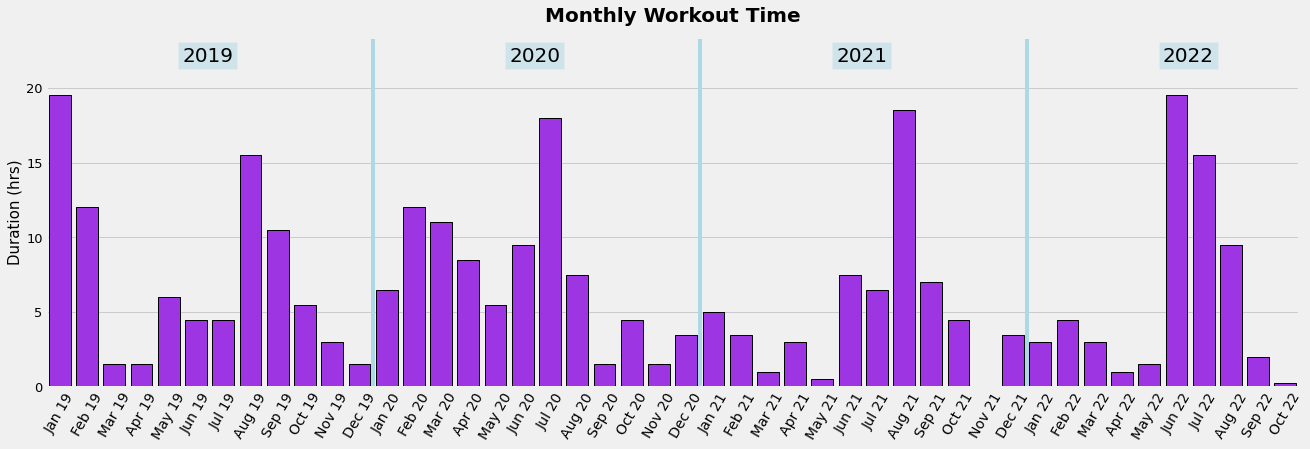

In [14]:
plot_monthly_single_barchart(df_workout, 'Monthly Workout Time')

### 🔵 Y: Total Productivity

In [15]:
# All
df_total = df_productive.copy()
df_total = df_total[df_total.Project != 'Social']
for project in df_total.Project.unique():
    df_total['Project'].replace(project, 'All', inplace=True)
df_total = df_total.groupby('Date', sort=False).sum()
df_total.reset_index(inplace=True)



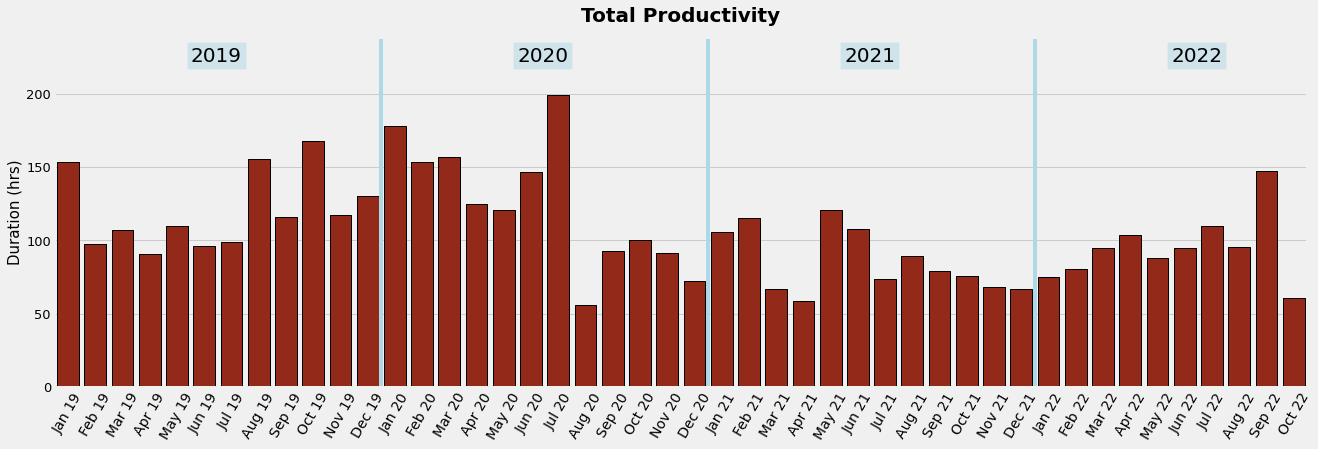

In [16]:
plot_monthly_single_barchart(df=df_total, title='Total Productivity', color='#A71A03')

### 🔵 Y: Academic vs Other Productivity
**Academic**
- Notes
- Data Science

**Other**
- To-Do
- Piano
- Workout

In [17]:
# Acad vs other data
df_acad_other = df_productive.copy()
df_acad_other = df_acad_other[df_acad_other.Project != 'Social']
df_acad_other['Project'].replace('Data Science', 'Academic', inplace=True)
df_acad_other['Project'].replace('Notes', 'Academic', inplace=True)
df_acad_other['Project'].replace('University', 'Academic', inplace=True)
df_acad_other['Project'].replace('To-Do', 'Other', inplace=True)
df_acad_other['Project'].replace('Piano', 'Other', inplace=True)
df_acad_other['Project'].replace('Workout', 'Other', inplace=True)
df_acad_other = df_acad_other.groupby(['Date', 'Project'], sort=False, as_index=False).sum()

In [18]:
df_acad_other.Project.unique()

array(['Academic', 'Other'], dtype=object)

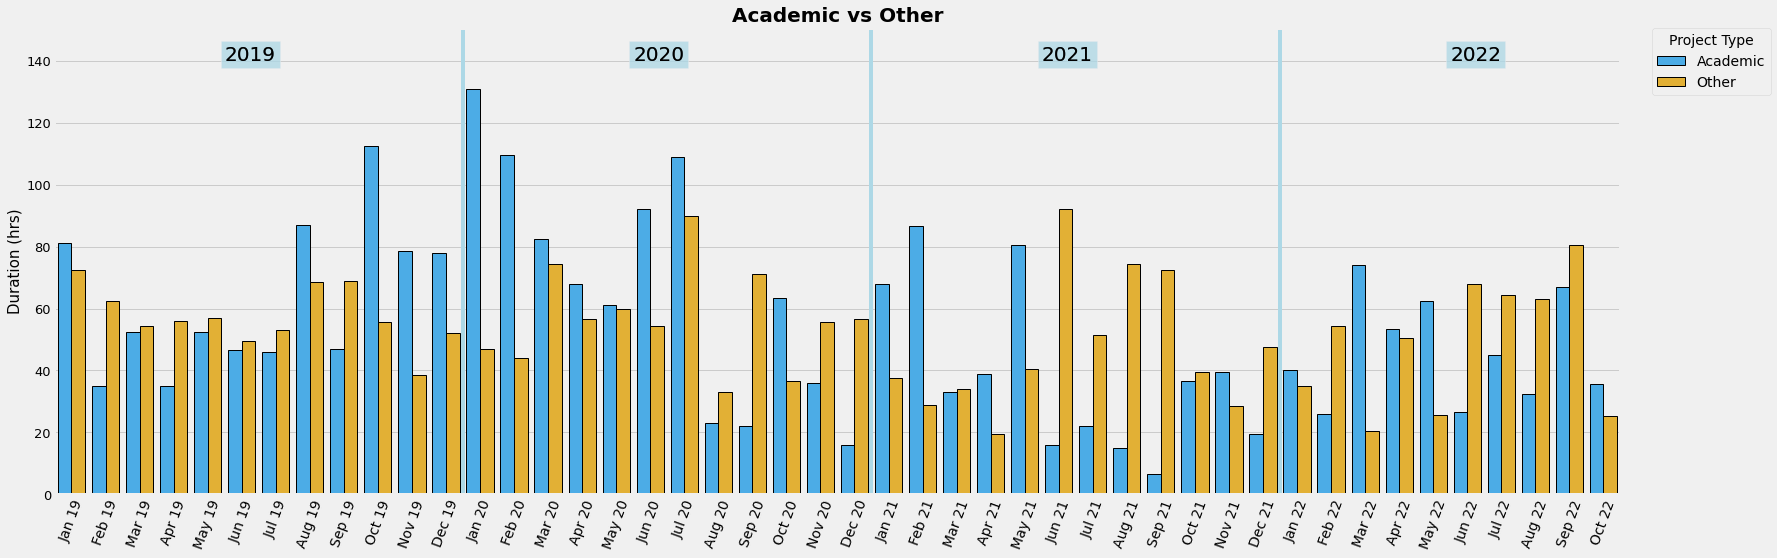

C:\Users\johng\AppData\Local\Temp\ipykernel_28076\1257455441.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


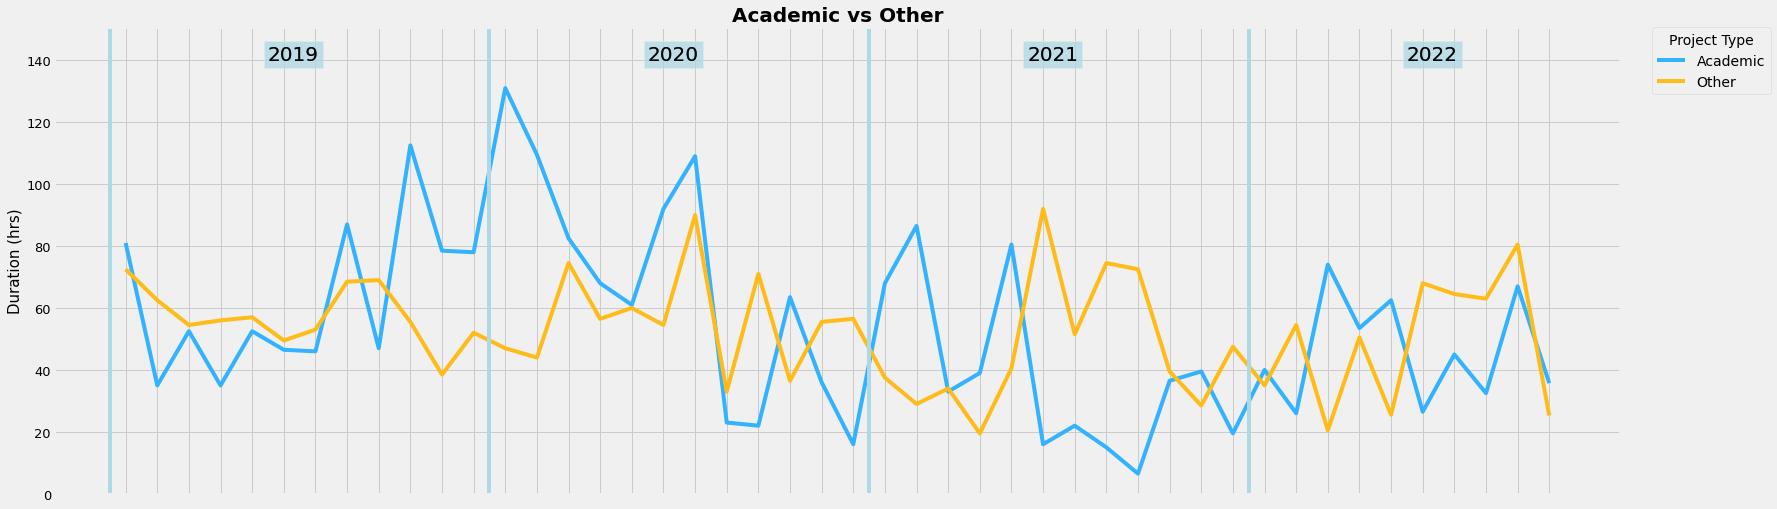

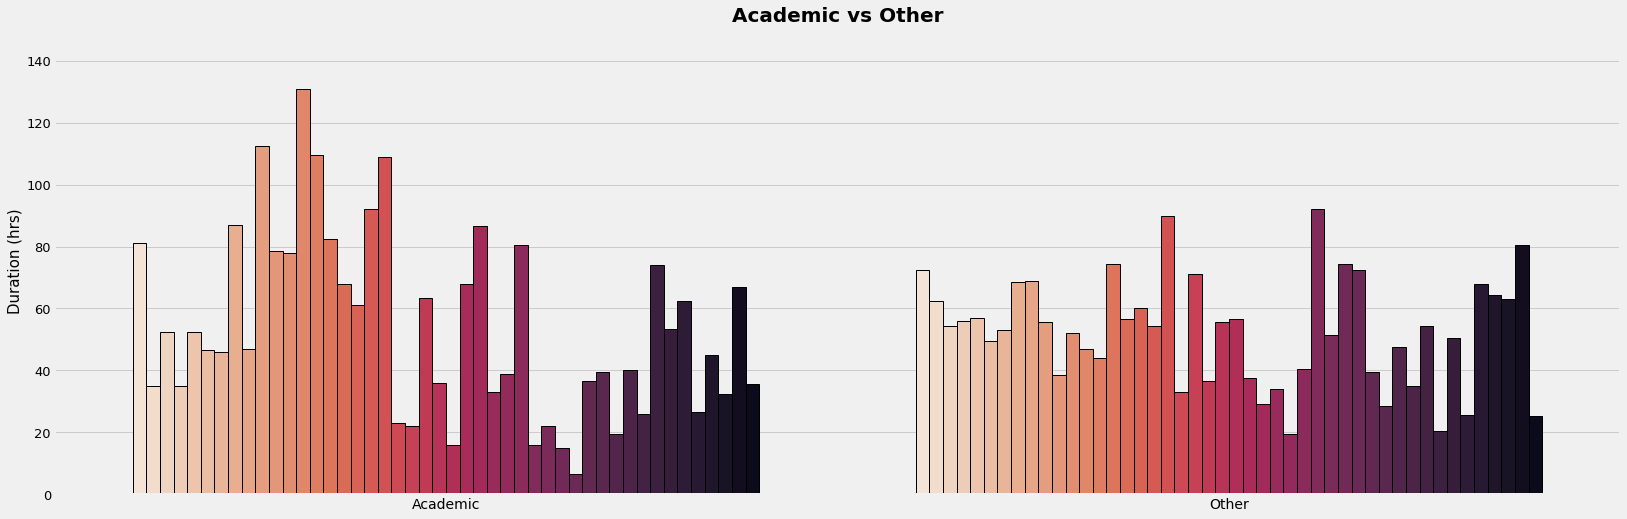

In [19]:
legendsize=10
title_size=20
title_pad = 15
bar_label_size=17
x_tick_size = 14
y_tick_size = 13
y_label_size=15
x_tick_rotation = 60
figsize=((25, 8))

title='Academic vs Other'


y_lim = df_acad_other['Duration (hrs)'].max() + df_acad_other['Duration (hrs)'].max() * 0.15

plt.style.use('fivethirtyeight') 
plt.figure(figsize=figsize)

# Set your custom color palette https://htmlcolorcodes.com/

colors = {'Other': "#FFBC18", 
          'Academic': "#33B2FF"}
hue_order = ['Academic', 'Other']


ax = sns.barplot(x='Date', y='Duration (hrs)', data=df_acad_other, hue='Project', ci=None, palette=colors, hue_order=hue_order, linewidth=1, edgecolor="k")
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title(title, fontsize=title_size, fontweight='bold')
plt.ylim([0, y_lim])                                                    # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.legend(title = 'Project Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



line_locs = []
line_year = []
for count, value in enumerate(df_acad_other.Date):
    if value.startswith('Jan'):
        line_locs.append(count)
        line_year.append('20'+value[-2:])
#line_locs = [count for count, value in enumerate(df_acad_other.Date) if value.startswith('Jan')]
for loc, year in zip(line_locs, line_year):
    plt.axvline(x = loc//2-0.5, color = 'lightblue', label = 'Year', linewidth=4)
    ax.text(loc//2-0.5 + 5, y_lim - 0.07*y_lim, year, fontsize = 20, 
         bbox = dict(facecolor = 'lightblue', alpha = 0.5))


plt.show()






'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''







title='Academic vs Other'


y_lim = df_acad_other['Duration (hrs)'].max() + df_acad_other['Duration (hrs)'].max() * 0.15

plt.style.use('fivethirtyeight') 
plt.figure(figsize=figsize)

# Set your custom color palette https://htmlcolorcodes.com/

colors = {'Other': "#FFBC18", 
          'Academic': "#33B2FF"}
hue_order = ['Academic', 'Other']


ax = sns.lineplot(x='Date', y='Duration (hrs)', data=df_acad_other, hue='Project', ci=None, palette=colors, hue_order=hue_order)
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title(title, fontsize=title_size, fontweight='bold')
plt.ylim([0, y_lim])                                                    # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(title = 'Project Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


line_locs = []
line_year = []
for count, value in enumerate(df_acad_other.Date):
    if value.startswith('Jan'):
        line_locs.append(count)
        line_year.append('20'+value[-2:])
#line_locs = [count for count, value in enumerate(df_acad_other.Date) if value.startswith('Jan')]
for loc, year in zip(line_locs, line_year):
    plt.axvline(x = loc//2-0.5, color = 'lightblue', label = 'Year', linewidth=4)
    ax.text(loc//2-0.5 + 5, y_lim - 0.07*y_lim, year, fontsize = 20, 
         bbox = dict(facecolor = 'lightblue', alpha = 0.5))




plt.show()








'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'''









title='Academic vs Other'
sns.set_palette(sns.color_palette("rocket_r"))
#sns.set_palette(sns.dark_palette("#69d", reverse=True, as_cmap=True))

y_lim = df_acad_other['Duration (hrs)'].max() + df_acad_other['Duration (hrs)'].max() * 0.15

plt.style.use('fivethirtyeight') 
plt.figure(figsize=figsize)

# Set your custom color palette https://htmlcolorcodes.com/

colors = {'Other': "#FFBC18", 'Academic': "#33B2FF"}


ax = sns.barplot(x='Project', y='Duration (hrs)', data=df_acad_other, hue='Date', ci=None, palette = 'rocket_r', linewidth=1, edgecolor="k")
plt.xlabel('')
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title(title, fontsize=title_size, fontweight='bold')
plt.ylim([0, y_lim])                                                    # Expand y axis range for visibility
ax.xaxis.set_tick_params(labelsize=x_tick_size)                         # Enlarge x ticks
ax.yaxis.set_tick_params(labelsize=y_tick_size)                         # Enlarge x ticks
#ax.bar_label(ax.containers[0], fontsize=bar_label_size, fmt='%.0f', fontweight='bold') # Show values above bars
plt.legend([],[], frameon=False)

plt.show()


### 🔵 ALL: Total Productivity